In [1]:
import os
import pandas as pd


In [2]:
import os
os.chdir('../')
import keras
from keras_preprocessing.image import ImageDataGenerator, array_to_img
from contrib_preprocessing import monkey_patch_all

monkey_patch_all()

Using TensorFlow backend.


In [3]:
augmentation = { "horizontal_flip": True, "vertical_flip": True, 'rotation_range': 45,
                 'fill_mode': 'constant', 'cval': 255, 'zoom_range': [1, 1.15] }
img_gen = ImageDataGenerator(**augmentation)

df = pd.read_csv(r"F:\jeremy\roof_learning_journal\witten\roof_pictures\witten_final_photos_dual.csv")
flow_args_rgb = {"directory": r"F:\jeremy\roof_learning_journal\witten\roof_pictures\combined",
             "dataframe": df, "class_column": 'class_rgb', 'src_column': 'src_rgb', 'batch_size': 1,
            'shuffle': False, 'seed':1}
flow_args_lidar = {"directory": r"F:\jeremy\roof_learning_journal\witten\roof_pictures\combined",
             "dataframe": df, "class_column": 'class_lidar', 'src_column': 'src_lidar', 'batch_size': 1,
            'shuffle': False, 'seed':1}

img_gen_iter_rgb = img_gen.flow_from_dataframe(**flow_args_rgb)
img_gen_iter_lidar = img_gen.flow_from_dataframe(**flow_args_lidar)

Found 2822 images belonging to 9 classes.
Found 2822 images belonging to 9 classes.


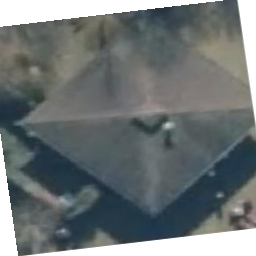

In [4]:
x, y = img_gen_iter_rgb.__next__()
array_to_img(x[0])

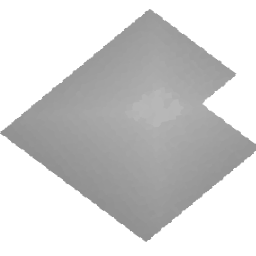

In [5]:
x, y = img_gen_iter_lidar.__next__()
array_to_img(x[0])

In [19]:
import util
test = util.image_generator_df(df, flow_args_lidar['directory'], modality='dual')


Found 2822 images belonging to 9 classes.
Found 2822 images belonging to 9 classes.


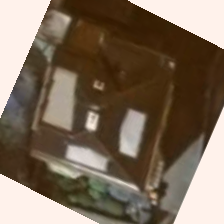

In [44]:
x, y = test.__next__()
array_to_img(x[0][0])

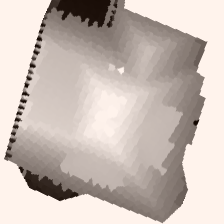

In [45]:
array_to_img(x[1][0])

## Modify image_generator

I need to know the dataframe, train/val/test, base directory, modality. Thats all thats is different 